In [1]:
import pandas as pd

df = pd.read_csv("Mall_Customers.csv")
df.head()


,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


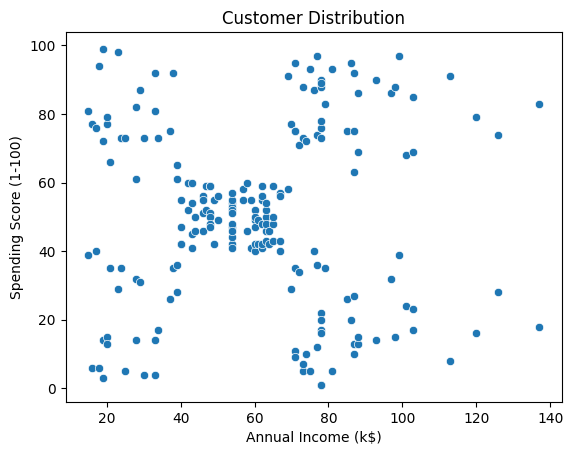

In [2]:
import matplotlib.pyplot as plt
import seaborn as sns

sns.scatterplot(x='Annual Income (k$)', y='Spending Score (1-100)', data=df)
plt.title("Customer Distribution")
plt.show()


In [3]:
from sklearn.cluster import KMeans

X = df[['Annual Income (k$)', 'Spending Score (1-100)']]

kmeans = KMeans(n_clusters=5, random_state=42)
df['Cluster'] = kmeans.fit_predict(X)


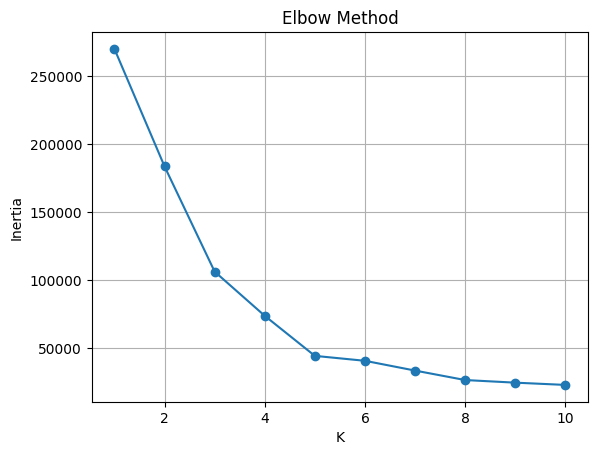

In [4]:
inertia = []
K_range = range(1, 11)

for k in K_range:
    km = KMeans(n_clusters=k, random_state=42)
    km.fit(X)
    inertia.append(km.inertia_)

plt.plot(K_range, inertia, marker='o')
plt.title("Elbow Method")
plt.xlabel("K")
plt.ylabel("Inertia")
plt.grid()
plt.show()


In [5]:
from sklearn.metrics import silhouette_score

score = silhouette_score(X, df['Cluster'])
print("Silhouette Score:", score)


Silhouette Score: 0.553931997444648


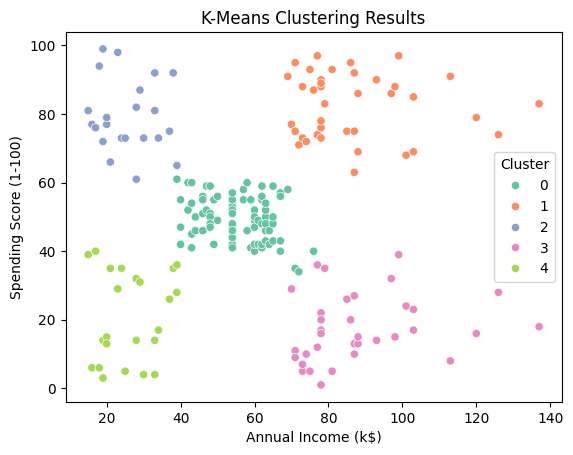

In [6]:
sns.scatterplot(x='Annual Income (k$)', y='Spending Score (1-100)', hue='Cluster', palette='Set2', data=df)
plt.title("K-Means Clustering Results")
plt.show()
